# Wine Quality Using Multi-Layer Perceptron

Input variables (based on physicochemical tests):
    
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulfates

11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

As we can see there are some null values along the dataset, lets add to the unknown values its mean.

In [7]:
df.update(df.fillna(df.mean()))

Lets now explore some features!

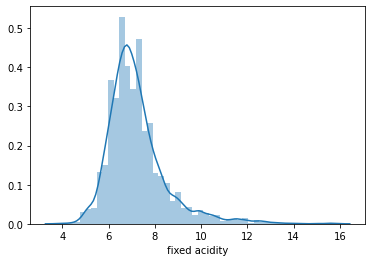

In [8]:
sns.distplot(df['fixed acidity'])

In [9]:
df['fixed acidity'].value_counts()

6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
6.45       1
3.90       1
13.40      1
3.80       1
14.30      1
Name: fixed acidity, Length: 107, dtype: int64

As the distribution plot and the value_counts prove, we have data above the 15 acidity that has low representation in the dataset so we can remove it

In [10]:
len(df['fixed acidity'])*(0.005)

32.485

In [11]:
df = df.sort_values('fixed acidity',ascending=False).iloc[32:] 

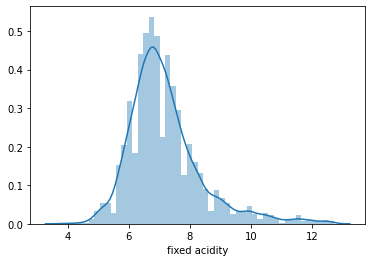

In [12]:
sns.distplot(df['fixed acidity'])

As we can see the type is not a number variable so we can transforme it!

In [13]:
df['type'] = df['type'].replace(to_replace=['white', 'red'], value=[1, 0])   

Lets consider that a quality above 5 is good and less is bad, so we can create a new feature according that.

In [14]:
df['Good Quality']=[1 if x>5 else 0 for x in df.quality]

Than we can drop the quality column since it won't be necessary

In [15]:
df = df.drop('quality', axis = 1)

Lets analyze the correlation between the features.

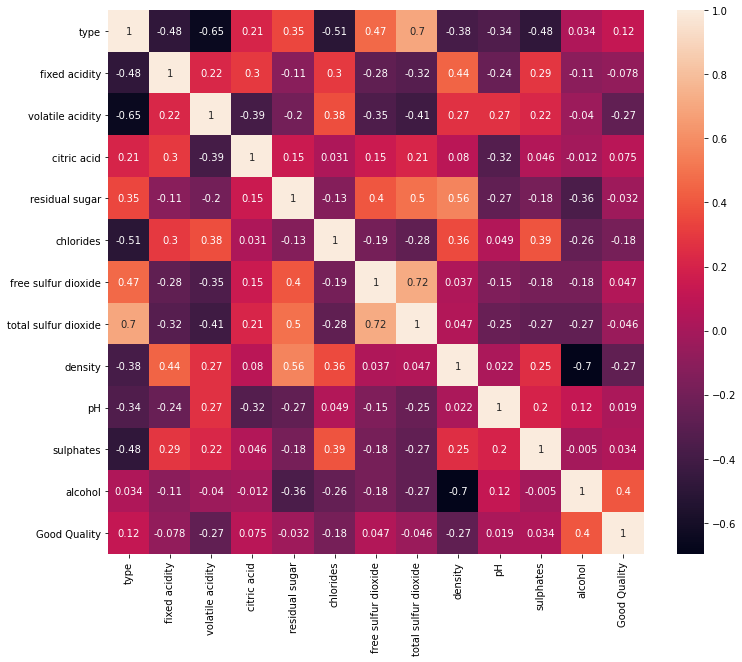

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)

In [17]:
X = df.drop('Good Quality', axis = 1).values
Y = df['Good Quality'].values

# <font color='green'><b> Nerual Network (MLP) </b></font>

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

### Scaling Data

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Creating The Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [22]:
X_train.shape

(4848, 12)

In [23]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

### Training The Model

In [25]:
model.fit(x=X_train_scaled,y=Y_train, validation_data=(X_test_scaled, Y_test), batch_size=450, epochs=600, callbacks=[cb])

Epoch 1/600
11/11 [==============================] - 1s 32ms/step - loss: 0.6853 - val_loss: 0.6731
Epoch 2/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6710 - val_loss: 0.6618
Epoch 3/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6601 - val_loss: 0.6493
Epoch 4/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6571 - val_loss: 0.6400
Epoch 5/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6492 - val_loss: 0.6341
Epoch 6/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6444 - val_loss: 0.6285
Epoch 7/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6400 - val_loss: 0.6184
Epoch 8/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6287 - val_loss: 0.6028
Epoch 9/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6209 - val_loss: 0.5878
Epoch 10/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6067 - val_loss: 0.5788
Epoch 11

11/11 [==============================] - 0s 4ms/step - loss: 0.5018 - val_loss: 0.4949
Epoch 84/600
11/11 [==============================] - 0s 4ms/step - loss: 0.5019 - val_loss: 0.4950
Epoch 85/600
11/11 [==============================] - 0s 4ms/step - loss: 0.5035 - val_loss: 0.4966
Epoch 86/600
11/11 [==============================] - 0s 4ms/step - loss: 0.5031 - val_loss: 0.4947
Epoch 87/600
11/11 [==============================] - 0s 4ms/step - loss: 0.5007 - val_loss: 0.4945
Epoch 88/600
11/11 [==============================] - 0s 4ms/step - loss: 0.5002 - val_loss: 0.4968
Epoch 00088: early stopping


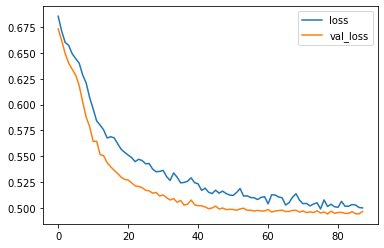

In [26]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Model Evaluation

In [27]:
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

In [28]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [29]:
print(confusion_matrix(Y_test,predictions))

[[395 187]
 [199 836]]


In [30]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       582
           1       0.82      0.81      0.81      1035

    accuracy                           0.76      1617
   macro avg       0.74      0.74      0.74      1617
weighted avg       0.76      0.76      0.76      1617



In [31]:
print(accuracy_score(Y_test,predictions))

0.7612863327149041
